In [7]:
from keras.datasets import cifar10
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train= x_train/255.0
x_test = x_test/255.0

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

import matplotlib.pyplot as plt
%matplotlib inline
epochs = 10
batch_size = 64
filter_size = 3
pool_size = 2
num_filters = 32






In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import numpy as np
np.random.seed(1338)
               
def build_model():
    model = Sequential()
    model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(num_filters, (filter_size, filter_size), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

    def plot_history(value):
        plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel("Loss")
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.legend(['training', 'validation'])
    
        plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel("accuracy")
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.legend(['training', 'validation'])
        plt.show()
    
    plot_history(history)
    
    loss, accuracy =model.evaluate(x_test, y_test, verbose=0)
    print(loss)
    print(accuracy)

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 132s 4ms/step - loss: 1.7003 - acc: 0.3808 - val_loss: 1.3886 - val_acc: 0.5177
Epoch 2/10
37500/37500 [==============================] - 123s 3ms/step - loss: 1.3865 - acc: 0.5030 - val_loss: 1.2004 - val_acc: 0.5813
Epoch 3/10
37500/37500 [==============================] - 123s 3ms/step - loss: 1.2531 - acc: 0.5541 - val_loss: 1.0852 - val_acc: 0.6192
Epoch 4/10
37500/37500 [==============================] - 123s 3ms/step - loss: 1.1696 - acc: 0.5871 - val_loss: 1.0367 - val_acc: 0.6351
Epoch 5/10
37500/37500 [==============================] - 124s 3ms/step - loss: 1.1100 - acc: 0.6053 - val_loss: 1.0427 - val_acc: 0.6333
Epoch 6/10
37500/37500 [==============================] - 123s 3ms/step - loss: 1.0537 - acc: 0.6293 - val_loss: 1.0549 - val_acc: 0.6307
Epoch 7/10
37500/37500 [==============================] - 124s 3ms/step - loss: 1.0156 - acc: 0.6392 - val_loss: 0.9857 - 

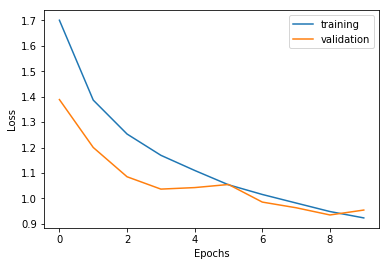

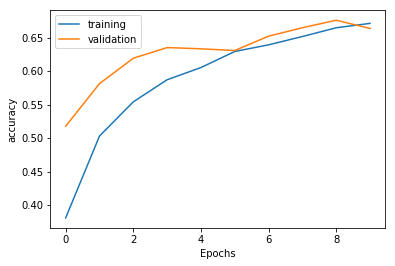

0.9499602170944214
0.6663
21min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
%timeit -n1 -r1 build_model()